# PEC4: Ingeniería de Características

En esta PEC vamos a trabajar de forma práctica los diferentes procesos de los que se encarga la ingeniería de características.

Para abordar las tareas relativas a la ingeniería de características con Python vamos a utilizar e introducir la  **librería sklearn** (https://scikit-learn.org/stable/index.html), ampliamente utilizada en procesos de aprendizaje automático e ingeniería de características. Utilizaremos diferentes módulos dependiendo cuál sea nuestro objetivo:



*   sklearn.preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
*   sklearn.feature_selection (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection).
* sklearn.decomposition (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition).
*   Entre otras.



Además, en esta librería podemos encontrar el módulo sklearn.datasets (https://scikit-learn.org/stable/datasets/index.html) que incluye conjuntos de datos que nos posibilitan experimentar y realizar pequeños análisis con una finálidad didáctica.

Cabe mencionar que, además de esta librería, continuaremos utilizando las librerías introducidas en las PAC anteriores: pandas, numpy, scipy y matplotlib para las visualizaciones.


**La parte práctica de esta PEC consta en un ejercicio único o Proyecto que girará entorno un dataset escogido por el estudiante entre las 4 opciones de datasets que es plantean:**

**Como en las prácticas anteriores, se realiza una breve introducción de las funciones e implementaciones relevantes que os puedan orientar en la realización del ejercicio práctico planteado.**

## 1. DETECCIÓN DE OUTLIERS Y VALORES NO OBSERVADOS

Como hemos visto en la teoría, **los outliers** en nuestro dataset serán los valores que _están más alejados del rango en donde se concentran la mayoría de las muestras_. Es decir, serán las muestras u observaciones que están distantes de otras observaciones.

Para observar los Outliers, de forma cualitativa, en primer lugar podemos obtener el gráfico box-plot de las variables del dataset.

Seguidamente, se pueden aplicar diferentes reglas y/o algoritmos que nos ayuden a detectarlos e identificarlos. Asimismo, el análisis o detección de outliers se puede realizar considerando las variables del dataset de forma independiente o conjuntamente. Concretamente, en esta PAC veremos y trabajaremos:

- _La regla considerando la media y la desviación estándar._ En cada variable se asocian como outliers los valores que sean menores que la media menos 2.5 desviaciones estandars (m-2.5·std) y los valores que sean superiores a la media más 2.5 desviaciones estandars (m+2.5·std). Este factor 2.5, puede ser modificado por el experto que realice el análisis si lo considera apropiado en función de la forma y tamaño de los datos. No obstante, por defecto se considera 2.5.  


-  _La regla considerando los cuartiles y el rango intercuartílico._ En cada variable se asocian como outliers los valores que están más de 1.5 veces el rango intercuartílico por encima del tercer cuartil (Q3), o por debajo del primer cuartil (Q1). Como sucede con la regla anterior, el factor por defecto de 1.5 puede cambiar (suele variar entre 1.5 y 3).

- Considerando conjuntamente las variables del dataset, podemos utilizar el _algoritmo de la Envolvente Elíptica_ (elliptic envelope en inglés), disponible también en la librería sklearn ( https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html). Este algoritmo tiene en cuenta la covarianza y es recomendable cuando los datos siguen una distribución normal.



A continuación se presenta cómo se puede utilizar el método de la Envolvente y los resultados que se obtienen aplicándolo al dataset dataset_outliers.csv.


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [9]:
PATH=""


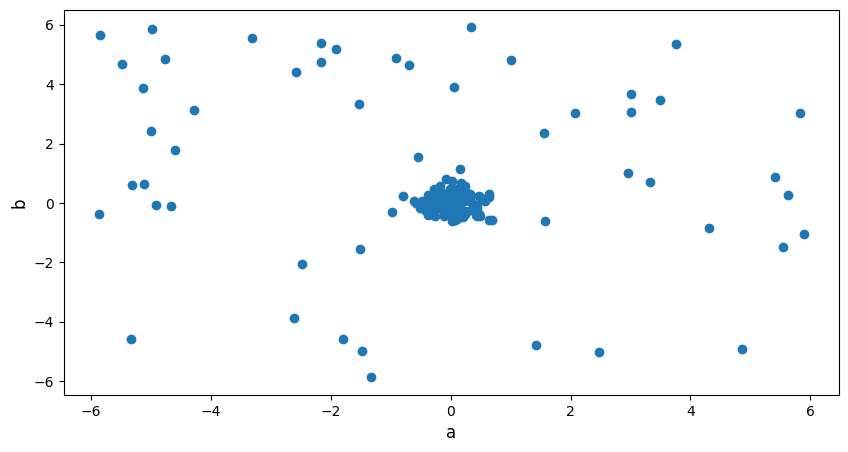

In [10]:
## Cargar dataset
df_outliers= pd.read_csv(PATH+'outliers.csv')

# Representar dataset
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

In [11]:
#Cargar librerías para utilizar el método de la Envelope
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [12]:
# Aplicar el método Envolvente Elípticaa los datos para detectar los Outliers
outlier_method = EllipticEnvelope().fit(df_outliers)
scores_pred = outlier_method.decision_function(df_outliers)
threshold = stats.scoreatpercentile(scores_pred, 25) # definición del umbral. Tomamos el percentil 25 como el percentil en el que se encuentran los outliers
x = outlier_method.predict(df_outliers) #Los outlieres están donde se predice el valor -1.
idx_outliers= np.where(x==-1)[0]

In [13]:
# Función para aplicar el método Envolvente Elíptica a los datos para detectar los Outliers
def detecion_outliers_m0(df):
  outlier_method = EllipticEnvelope().fit(df)
  scores_pred = outlier_method.decision_function(df)
  x = outlier_method.predict(df) #Los outlieres están donde se predice el valor -1.
  idx_outliers= np.where(x==-1)[0]

  return idx_outliers, df.iloc[idx_outliers,:]

idx_outliers_m0, valores_outliers_m0=detecion_outliers_m0(df_outliers)

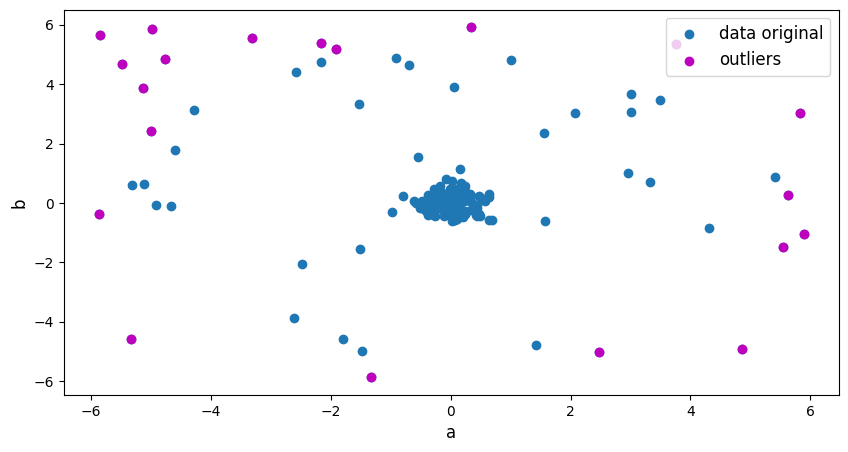

In [14]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values, label='data original')
ax.scatter(df_outliers.a.values[idx_outliers_m0],df_outliers.b.values[idx_outliers_m0],c='m', label='outliers')
plt.legend(fontsize=12)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

Adicionalmente, se pueden usar los valores de _scores_pred_ para establecer un umbral a partir del cual los valores son considerados outliers. Se suele establecer el umbral en función de un percentil determinado de la distribución de los datos (p.ejemplo percentil 25, 20, 10). Este valor de umbral puede variar en función de la naturaleza de los datos.

A continuación se muestra como quedaría modificada la función:



In [16]:
# Función para aplicar un umbral dependiente del percentil de la distribución N-dimensional de los datos
def detecion_outliers_m0_umbral(df, percentil):
  outlier_method = EllipticEnvelope().fit(df)
  scores_pred = outlier_method.decision_function(df)
  threshold = stats.scoreatpercentile(scores_pred, percentil) # definición del umbral. Tomamos el percentil 25 como el percentil en el que se encuentran los outliers
  x = outlier_method.predict(df) #Los outlieres están donde se predice el valor -1.
  idx_outliers= np.where(scores_pred<=threshold)[0]

  return idx_outliers, df.iloc[idx_outliers,:]

idx_outliers_m0_umbral, valores_outliers_m0_umbral=detecion_outliers_m0_umbral(df_outliers,25)

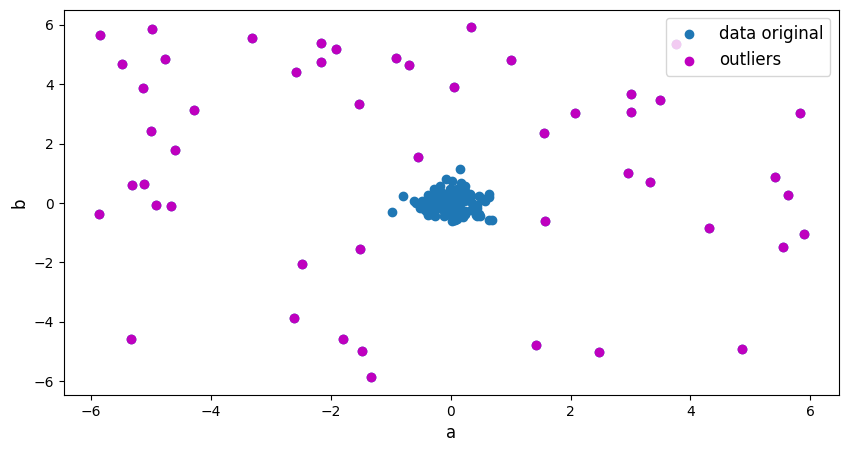

In [17]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values, label='data original')
ax.scatter(df_outliers.a.values[idx_outliers_m0_umbral],df_outliers.b.values[idx_outliers_m0_umbral],c='m', label='outliers')
plt.legend(fontsize=12)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

Por otro lado, respecto a la imputacion de los **datos faltantes**, en el reto anterior, ya vimos que una forma común de proceder es la imputación de los valores faltantes por la media, la mediana o la eliminación de los valores, según sea más apropiado.

En este reto, vamos a prestar atención en la _interpolación_ como método para imputar los valores faltantes.

Como se presenta en la teoría, tenemos diferentes tipos de interpolación (con el valor más cercano, lineal, cubica,...). La implementación de esta metodología se puede abordar con la utilización de la libreria scipy.

A continuación se presena un ejemplo de cómo se pueden implementar los diferentes tipos de interpolación.

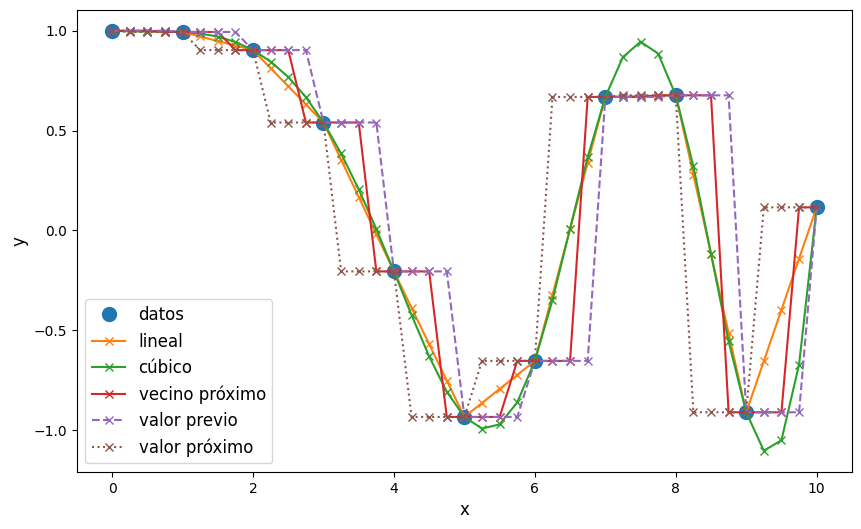

In [19]:
## Código interpolación

from scipy.interpolate import interp1d

plt.figure(figsize=(10,6))
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

xnew = np.linspace(0, 10, num=41, endpoint=True)


f = interp1d(x, y)
f1 = interp1d(x, y, kind='cubic')
f2 = interp1d(x, y, kind='nearest')
f3 = interp1d(x, y, kind='previous')
f4 = interp1d(x, y, kind='next')

plt.plot(x, y, 'o',ms='10')
plt.plot(xnew, f(xnew),'x-' ,xnew, f1(xnew),'x-')
plt.plot(xnew, f2(xnew), 'x-', xnew, f3(xnew), 'x--', xnew, f4(xnew), 'x:')
plt.legend(['datos', 'lineal', 'cúbico','vecino próximo', 'valor previo', 'valor próximo'], loc='best', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()






Cómo se puede observar a la imagen, con la interpolación hemos conseguido tener valores para cada valor de la nueva x con una resolución menor (cada 0.25).

## 2. TRANSFORMACIONES Y ESCALADO DE VARIABLES

En esta parte vamos a trabajar las transformaciones de los datos. Como se ha introducido en la teoría, existen diferentes métodos para transformar los datos, entre los cuales, los más utilizados serían:
- Min-max
- Max absoluto
- Estandarización
- Normalización

La librería sklearn en su módulo _sklearn.preprocessing_, ofrece la implementación de estos métodos para su ulitización en el proceso de ingeniería de características (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

A continuación, usando el dataset _planetas.csv_, se introduce como utilizar esta librería para realizar el escalado de los datos. Aunque este dataset no va a ser utilizado en los ejercicios prácticos, se adjunta con la PAC por si se quieren reproducir los resultados.



In [23]:
df_planeta = pd.read_csv(PATH+'Planetas.csv',sep=',',encoding='latin-1').dropna(how='all')

In [24]:
from sklearn.preprocessing import StandardScaler

X=df_planeta['Diametro'].values.reshape(-1, 1)

## Escalado Min- max
from sklearn.preprocessing import MinMaxScaler
X_transf_minmax = MinMaxScaler().fit_transform(X)


## Escalado Max absoluto
from sklearn.preprocessing import MaxAbsScaler
X_transf_maxAbs = MaxAbsScaler().fit_transform(X)


## Estandarización
from sklearn.preprocessing import StandardScaler
X_transf_estand = StandardScaler().fit_transform(X)

##Normalización
from sklearn.preprocessing import normalize
X_transf_norm = normalize(X, norm='l2',axis=0)

df_transform=pd.DataFrame()
df_transform['original']=df_planeta['Diametro'].values
df_transform['min_max']=X_transf_minmax
df_transform['max_abs']=X_transf_maxAbs
df_transform['Estandarizacion']=X_transf_estand
df_transform['Normalizacion']=X_transf_norm

df_transform

,original,min_max,max_abs,Estandarizacion,Normalizacion
0,4878,0.000000,0.034116,-0.896357,0.024263
1,12100,0.052293,0.084625,-0.753163,0.060186
2,12756,0.057043,0.089213,-0.740156,0.063449
3,6787,0.013823,0.047467,-0.858506,0.033759
4,142984,1.000000,1.000000,1.841933,0.711210
5,120536,0.837458,0.843003,1.396846,0.599553
6,51108,0.334743,0.357439,0.020266,0.254214
7,49538,0.323375,0.346458,-0.010863,0.246405


Hemos visto la transformación en variables numéricas. Ahora, vamoa a introducir las **transformaciones de variables categóricas en variables numéricas** mediante las técnicas One-Hot Encoder y ordinal Encoder, disponibles también en el módulo _sklearn.preprocessing_ de la librería sklearn.

A continuación se muestra a modo de ejemplo la codificación por ambos métodos de la variable _'Planeta'_ del dataset anterior.



In [26]:
## Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

X2=df_planeta['Planeta'].values.reshape(-1, 1)
enc = OrdinalEncoder()
enc.fit(X2)
X2_endod1=enc.transform(X2)

pd.concat([df_planeta, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0
0,Mercurio,4878,2.0
1,Venus,12100,7.0
2,Tierra,12756,5.0
3,Marte,6787,1.0
4,Júpiter,142984,0.0
5,Saturno,120536,4.0
6,Urano,51108,6.0
7,Neptuno,49538,3.0


In [27]:
## One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(drop='first') ##
enc2.fit(X2)
X2_endod1= enc2.transform(X2).toarray()

pd.concat([df_planeta, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0,1,2,3,4,5,6
0,Mercurio,4878,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Venus,12100,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Tierra,12756,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Marte,6787,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Júpiter,142984,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Saturno,120536,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Urano,51108,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,Neptuno,49538,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3. EXTRACCIÓN DE CARACTERÍSTICAS




En esta parte de la PEC vamos a trabajar las técnicas de extracción o selección de características. Como hemos visto en la teoría, tenemos los métodos de filtros y los métodos embebidos (conocidos como métodos wrapper).



Antes de empezar con estas técnicas, es recomendable estudiar si existe correlación lineal entre las variables del dataset. De esta forma podemos discernir si hay variables redundantes e irrelevantes.

Una práctica común es obtener la matriz de correlaciones. Para ello, vamos a ejecutar el siguiente código. Para ejemplificar este proceso, se ha utilizado uno de los datasets disponibles a la librería sklearn, concretamente  load_breast_cancer (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).


In [31]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names

df=pd.DataFrame(data= X, columns=feature_names)

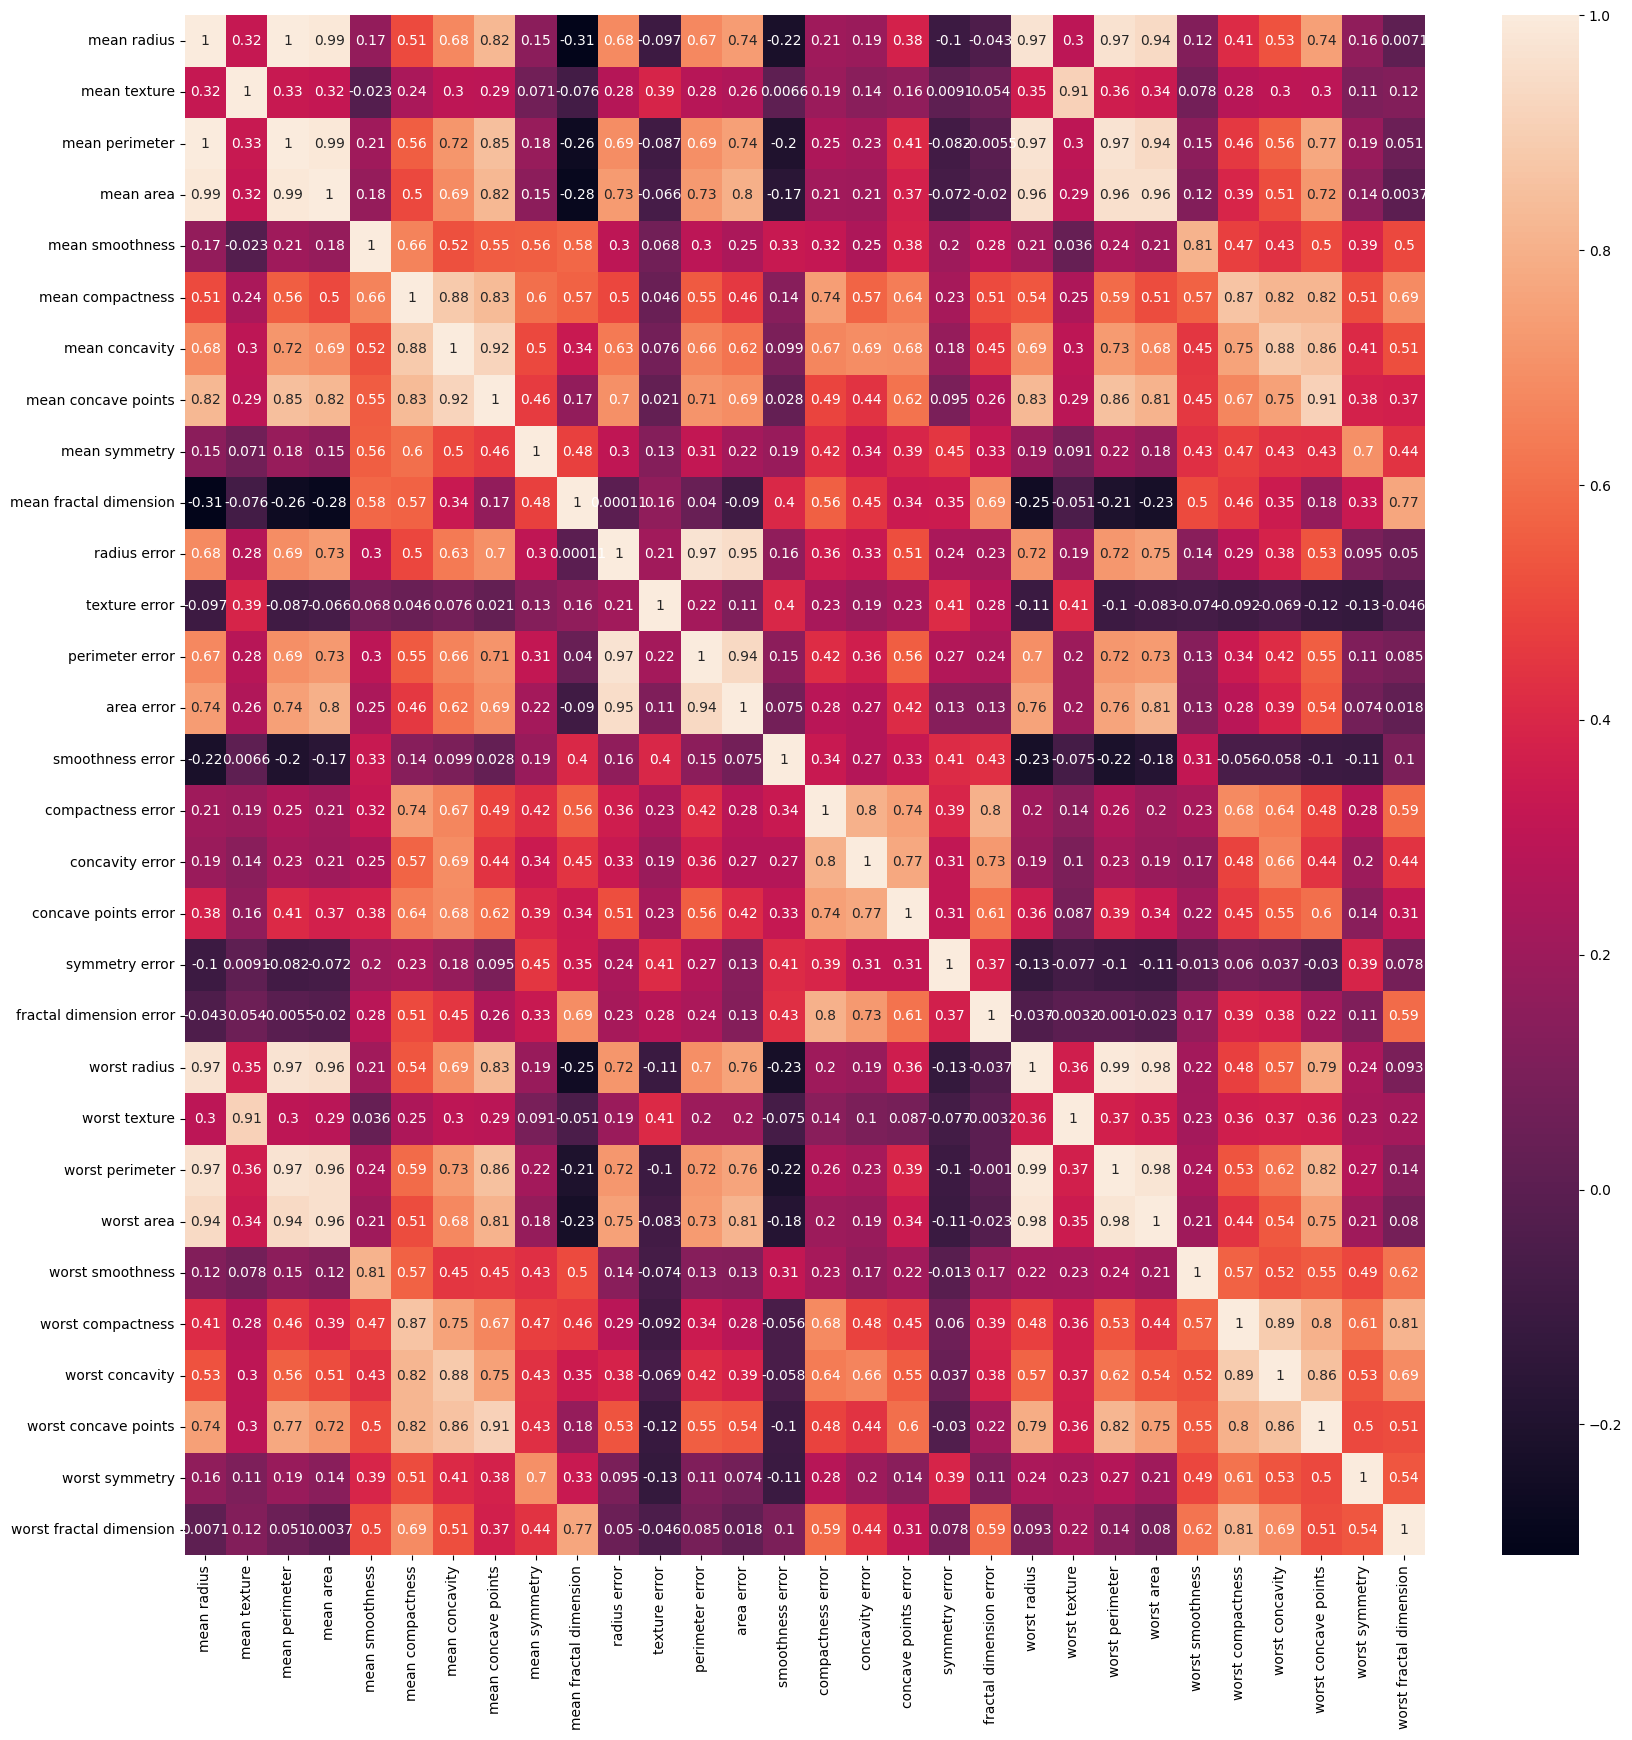

In [32]:
## Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat, annot = True)
plt.show()



Podemos observar que “mean_radius” , “mean perimeter”,  “mean área”, “worst radius”, “worst_perimeter” y “worst area” estan fuertamente correlacionadas. Por tanto, serian 5 de estas características redundantes i se pueden eliminar.

### 3.1. Filtros

En esta parte, para trabajar el filtro basado en el ranking de características vamos a utilizar el módulo _sklearn.feature_selection_ de la librería sklearn (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection). El ranking lo construiremos basandonos en diferentes coeficientes. Concretamente, si estamos frente a un problema de clasificación, utilizaremos:
> f_classif, chi2, mutual_info_classif

En cambio, si estamos frente a un problema de regresión, usaremos:


> f_regression, mutual_info_regression




Para ejemplificar este proceso, vamos a utlizar uno de los datasets disponibles en la librería sklearn, concretamente el _load_breast_cancer_ (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) y obtener el ranking de sus características basándose en la métrica de la Información Mútua.

In [37]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names

The breast cancer dataset is a classic and very easy binary classification dataset.

In [39]:
# Evaluación y selección de caracteristicas (obtener ranking de características)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all').fit(X,y)
dfscores = pd.DataFrame(bestfeatures.scores_)

featureScores = pd.concat([pd.DataFrame(feature_names),dfscores],axis=1)
featureScores.columns = ['Caracteristica','Chi2']
featureScores=featureScores.nlargest(len(featureScores),'Chi2')

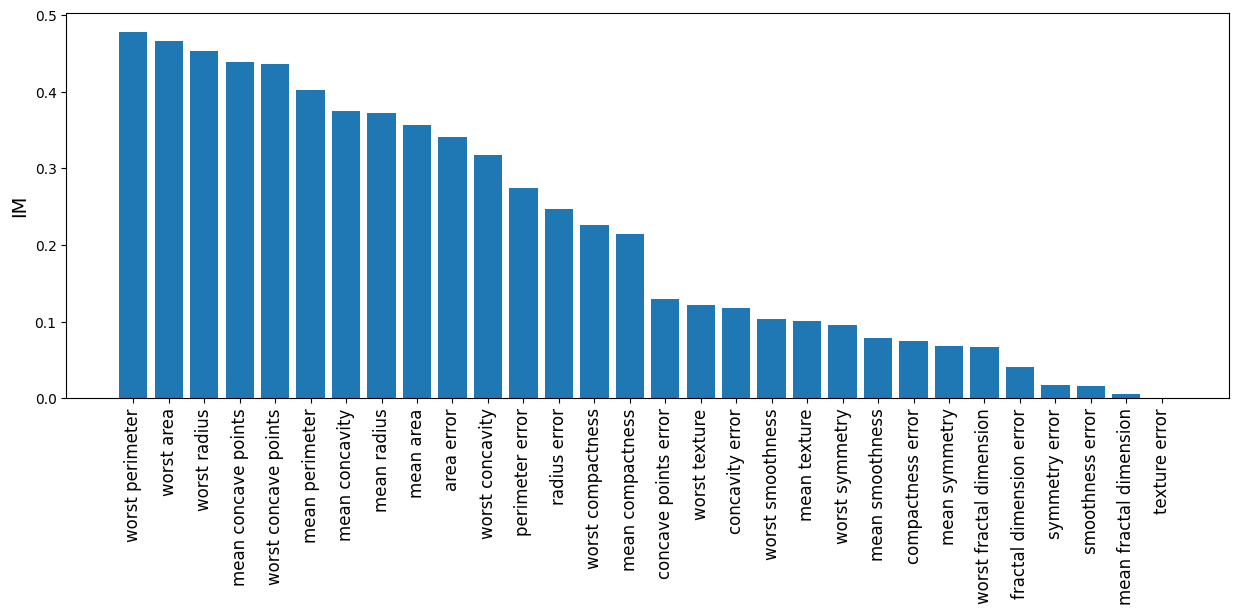

In [40]:
# Representación del ranking de características basado en IM
plt.figure(figsize=(15,5))
xs=np.linspace(start=0, stop=len(featureScores)-1,num=len(featureScores))
plt.bar(xs, featureScores['Chi2'].values)
plt.xticks(xs, featureScores['Caracteristica'], rotation=90, fontsize=12)
plt.ylabel('IM', fontsize=14)
plt.show()

Observando los valores obtenidos, se advierte un cambio de dinámica cerca de la IM=0.2. Este hecho sugeriría poner un umbral en este valor y conservar las características que tengan un valor de IM mayor que 0.2.

Como se comenta en la teoría, es conveniente ser conservadores cuando realizamos selección de características con filtros ya que no considera el tipo de modelo que se obtendrá con los datos y su finalidad. Para ello, se recomienda obtener diversos rankings basándose en otras métricas y excluir las carácterísticas que cumplan los criterios en el conjunto de métricas obtenidas.

En el código expuesto anteriormente, para realizar el cambio de métrica es suficiente con modificar la _score_func_ utilizada para obtener los resultados del _SelectKBest()_.



### 3.2. Métodos de envoltura (Wrappers)

En los métodos de envoltura (wrapper methods en inglés), la selección de características se hace de forma iterativa hasta encontrar el subset de características óptimo. Es decir, se selecciona un conjunto de características i se entrena el modelo con ellas. En función de los resultados obtenidos, se decide si añadir o eliminar características al subset i se vuelve a evaluar el modelo.  Como hemos visto en la teoría, esta seleccion del conjunto de características iterativo se puede hacer hacia delante, hacia atrás y mediante la eliminación recursiva de características.







Las opciones de convergencia del método pueden considerar diferentes y multíples condiciones dependiendo del objetivo del estudio y de la experiencia del experto que realiza el proceso de ingeniería de características. **En este ejemplo vamos a considerar la condición de que la evaluación iterativa para cuando añadiendo la siguiente característica no se consigue mejorar el valor de la función de coste (el error de estimación).** No obstante, se podrían añadir condiciones adicionales como que la mejora fuera como mínimo de un determinado porcentaje o que esta mejora se mantuviese dos iteraciones seguidas, entre otras.

En la librería sklearn encontramos la función RFE (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) que nos puede ayudar en esta tarea puesto que nos devuelve la selección de carácterístiques óptimas para el modelo escogido según el número de características que se quiera considerar. Por lo tanto, los parámetres principales de entrada son el modelo y el número de características a considerar.

A continuación se muestra un código de ejemplo que devuelve el error de estimación del modelo de regresión definido, considerando diferentes números de características.

NOTA: La variable objetivo o clase en este dataset se la variable relativa al Ladder score ('ladder_score').

Cómo se trata de un problema de clasificación, el error lo mediremos con la accuracy.

In [47]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names
df=pd.DataFrame(data= X, columns=feature_names)
# eliminar colinealidades entre “mean_radius” , “mean perimeter”, “mean área”, “worst radius”, “worst_perimeter” i “worst area” (a partir de la matriz de correlación)
df.drop(columns=['mean perimeter', 'mean area','worst radius', 'worst perimeter', 'worst area'], inplace=True)
# eliminar colinealidades entre “radius error”, “perimeter error” , “área error” (a partir de la matriz de correlación)
df.drop(columns=['perimeter error', 'area error'], inplace=True)
X=df.values

In [48]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, len(X.T)+1):
		rfe = RFE(estimator=RandomForestClassifier(random_state=44), n_features_to_select=i)
		model = RandomForestClassifier(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = model.score(X_test, y_test)
  return scores


# definir las variables entrada-salida
#X=X
#y=y.reshape(-1, 1)

# Obtener modelos a evaluar
models = get_models()
# evaluar los modelos y almacenar métricas
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>N_caracteristicas %s --> mape: %.3f' % (name, scores))


>N_caracteristicas 2 --> mape: 0.930
>N_caracteristicas 3 --> mape: 0.942
>N_caracteristicas 4 --> mape: 0.942
>N_caracteristicas 5 --> mape: 0.953
>N_caracteristicas 6 --> mape: 0.947
>N_caracteristicas 7 --> mape: 0.959
>N_caracteristicas 8 --> mape: 0.965
>N_caracteristicas 9 --> mape: 0.959
>N_caracteristicas 10 --> mape: 0.959
>N_caracteristicas 11 --> mape: 0.965
>N_caracteristicas 12 --> mape: 0.965
>N_caracteristicas 13 --> mape: 0.965
>N_caracteristicas 14 --> mape: 0.965
>N_caracteristicas 15 --> mape: 0.965
>N_caracteristicas 16 --> mape: 0.965
>N_caracteristicas 17 --> mape: 0.965
>N_caracteristicas 18 --> mape: 0.965
>N_caracteristicas 19 --> mape: 0.965
>N_caracteristicas 20 --> mape: 0.965
>N_caracteristicas 21 --> mape: 0.959
>N_caracteristicas 22 --> mape: 0.959
>N_caracteristicas 23 --> mape: 0.965


Com es pot observar, en cada iteració es considera un nombre de carácterístiques, sent la o les característiques escollides en cada iteráció la combinació que millor resultats ofereix.
D'acord amb els resultats, la interació que presenta 8 característiques es la que millor accuracy té. Les 8 característique utilitzades son:

Cómo se puede observar, en cada iteración se considera un número de carácterístiques, siendo las características escogidas en cada iteráció la combinación que mejor resultados ofrece. De acuerdo con los resultados, la interació que presenta 8 características se la que mejor accuracy tiene. Las 8 característique utilizadas son:

In [50]:
df.columns[models['6'][0].support_==True]


Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'worst concavity', 'worst concave points'],
      dtype='object')

---

## 4. REDUCCIÓN DE LA DIMENSIONALIDAD

Cuando tenemos un dataset con un número significativo de carácterísticas, es recomendable analizar la posibilidad de reducir su dimensionalidad. Una de las técnicas más utilizadas es el Analisis de Componentes Principales (PCA). Este método, mediante una transformación ortogonal de las características (componentes), evalua si con un determinado numero de componentes se puede explicar gran parte de la varianza de los datos. Normalmene, se suelen asignar como componentes principales aquellos que son capaces de explicar la varianza de almenos el 70-80% de los datos. Por tanto, utilzando estos componentes principales, seremos capaces de obtener modelos y aplicar los algoritmos de interés para el análisis, utilizando un dataset con una dimensionalidad menor.

Para realizar el Analisis de Componentes Principales (PCA) vamos a utilizar la el módulo _sklearn.decomposition_ de la librería sklearn.

A continuación, se muestra el código que nos permitirá obtener los componentes ortogonales y determinar los componentes principales del dataset utilizado anteriormente _breast_cancer_.



In [55]:
# Cargar dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Asignar variables
X=data.data
y=data.target
feature_names=data.feature_names
df=pd.DataFrame(data= X, columns=feature_names)
# eliminar colinealidades entre “mean_radius” , “mean perimeter”, “mean área”, “worst radius”, “worst_perimeter” i “worst area” (a partir de la matriz de correlación)
df.drop(columns=['mean perimeter', 'mean area','worst radius', 'worst perimeter', 'worst area'], inplace=True)
# eliminar colinealidades entre “radius error”, “perimeter error” , “área error” (a partir de la matriz de correlación)
df.drop(columns=['perimeter error', 'area error'], inplace=True)
X=df.values

In [56]:
# Estandarizacion datos
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA # Principal Component Analysis module
pca = PCA(n_components=len(X_std.T))
x_componentes = pca.fit_transform(X_std)
var_exp=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(var_exp)

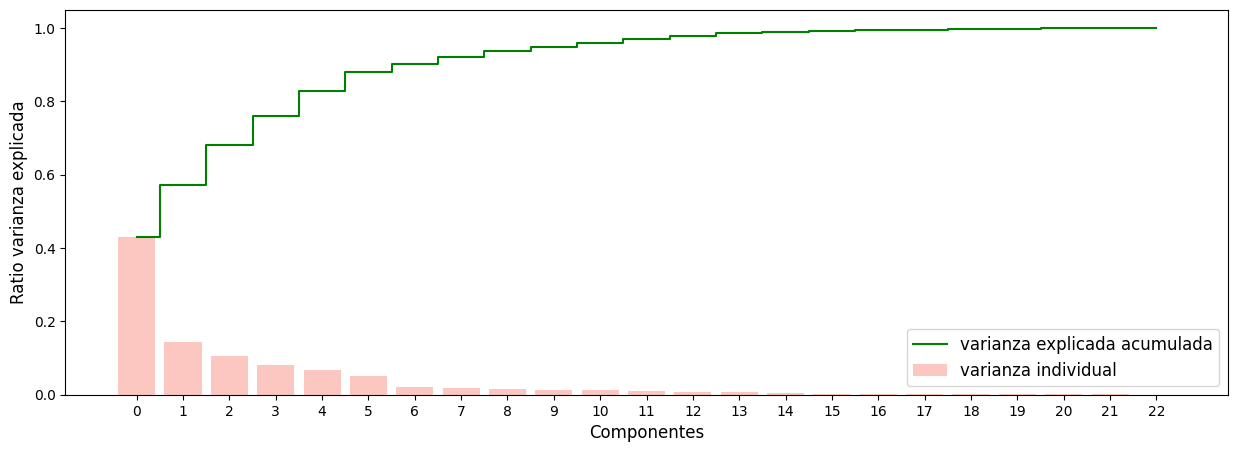

In [57]:
#Representar varianza y varianza acumulada junto con los componentes
plt.figure(figsize=(15, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.44, align='center', label='varianza individual', color = 'salmon')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='varianza explicada acumulada',color='g')
plt.xticks(ticks=range(len(cum_var_exp)))
plt.ylabel('Ratio varianza explicada', fontsize=12)
plt.xlabel('Componentes', fontsize=12)
plt.legend(loc='lower right',fontsize=12)




Observando el gráfico podemos advertir que con 4 componentes podemos explicar como mínimo el 70% de la varianza de los datos. Por tanto, los datos con los 4 componentes principales quedarán así:

In [59]:
cum_var_exp

array([0.43086476, 0.57328926, 0.68014805, 0.76023719, 0.82727438,
       0.87959814, 0.90173629, 0.92073175, 0.93641767, 0.94884863,
       0.96044987, 0.97041631, 0.97883234, 0.98553353, 0.98914892,
       0.99171017, 0.99393503, 0.99543354, 0.99674376, 0.9979785 ,
       0.99900342, 0.99964387, 1.        ])

In [60]:
pca_pc = PCA(n_components=4)
X_pc= pca_pc.fit_transform(X_std)

X_pc.shape

(569, 4)

## ENUNCIADO ÚNICO

En esta parte se plantea la realización de todo el proceso de ingeniería de características con un dataset escogido por el alumno de los tres que se proponen a continuación. De este modo, el alumno tendrá que cargar el conjunto de datos con el que desee realizar la actividad y llevar a cabo todos los pasos que se han ido mostrando previamente en esta PEC. En cada paso, las conclusiones que se pueden extraer o los resultados obtenidos tienen que ser comentados.

1.  Income Data Set https://archive.ics.uci.edu/dataset/2/adult
2.	Dermatology Data Set https://archive.ics.uci.edu/dataset/33/dermatology
3.	Bankrupcy Data Set (Podéis elegir cualquier año) https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data
4. Horse Colic Data Set https://archive.ics.uci.edu/ml/datasets/Horse+Colic

Los datasets están disponible a los links que se indican. Tendréis que clicar en Download Data Folder y descargaros el fichero comprimido donde encontraréis los datos.

**Una vez escogida el dataset, los pasos y las cuestiones que tienen que ser cumplimentadas y respondidas son las que se especifican a continuación:**

Elijo Income Data Set

### 1. Basándose en el dataset escogido, ¿cuál es el objetivo de este análisis o micro-proyecto?

In [66]:
# Leer el archivo
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [67]:
df = pd.concat([X, y], axis=1)

1.1. Cargar los datos y guardarlos como un dataframe, asignando un nombre pertinente a las columnas.

1.2. Describir brevemente el dataset elegido

1.3. Determinar qué tipo de problema se puede abordar con él (problema de clasificación o de regresión).

1.4. Determinar de qué tipo es cada una de las variables del dataset. ¿A qué hace referencia cada una de ellas? ¿Cuáles son las características? ¿Cuál (o cuáles) es la clase o variable de respuesta?




In [69]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [70]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


_Comentarios:_

Lo primero es describir las variables:
Variables numéricas:
	•	age: Edad del individuo.
	•	fnlwgt: Ponderación poblacional.
	•	education-num: Años de educación formal.
	•	capital-gain: Ganancias de capital.
	•	capital-loss: Pérdidas de capital.
	•	hours-per-week: Horas trabajadas por semana.

Variables categóricas:
	•	workclass: Tipo de empleo (Private, Self-emp-not-inc, etc.).
	•	education: Nivel educativo alcanzado (HS-grad, Bachelors, etc.).
	•	marital-status: Estado civil (Married, never-married, etc.).
	•	occupation: Ocupación (Prof-specialty, Sales, etc.).
	•	relationship: Relación con el jefe de familia (Husband, Not-in-familly, etc.).
	•	race: Raza (White, black, etc.).
	•	sex: Género (Male, Female).
	•	native-country: País de origen (United States, México, etc.).

Variable objetivo:
	•	income: Clasificación binaria para el nivel de ingresos:
	•	>50K: Más de 50,000 USD al año.
	•	<=50K: Menos o igual a 50,000 USD al año.
 
Tenemos mas de 48mil registros, 14 características y una variable objetivo(de respuesta).
El problema podemoslos definirlo como de clasificación, prediciendo si gana menos de 50mil, o mas, podemos usar regresion linear, arboles de decision, redes neuronales o cualquier algoritmo que permita hacer una clasificaion

### 2. Análisis descriptivo de las variables.

2.1. Obtener las principales métricas descriptivas (media, mediana, desviación estándar, percentil25, percentil75, mínimo, máximo) para las variables numéricas.

2.2. Obtener las tablas de frecuencia de las variables categóricas.

2.3. Obtener histogramas para los datos numéricos y diagramas  de frecuencia para los datos categóricos.

2.4. ¿Cómo son sus distribuciones? ¿Encuentras alguna particularidad en los datos?


In [76]:
col_num = df.select_dtypes(include=['number']).columns
col_no_num = df.select_dtypes(exclude=['number']).columns

descripcion_num = df[col_num].describe().T
descripcion_num['median'] = df[col_num].median()
descripcion_no_num = df[col_no_num].describe(include='all').T


In [77]:
descripcion_no_num 


,count,unique,top,freq
workclass,47879,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,47876,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48568,42,United-States,43832
income,48842,4,<=50K,24720


In [78]:
descripcion_num

,count,mean,std,min,25%,50%,75%,max,median
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0,37.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0,178144.5
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0,10.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0,0.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0,0.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0,40.0


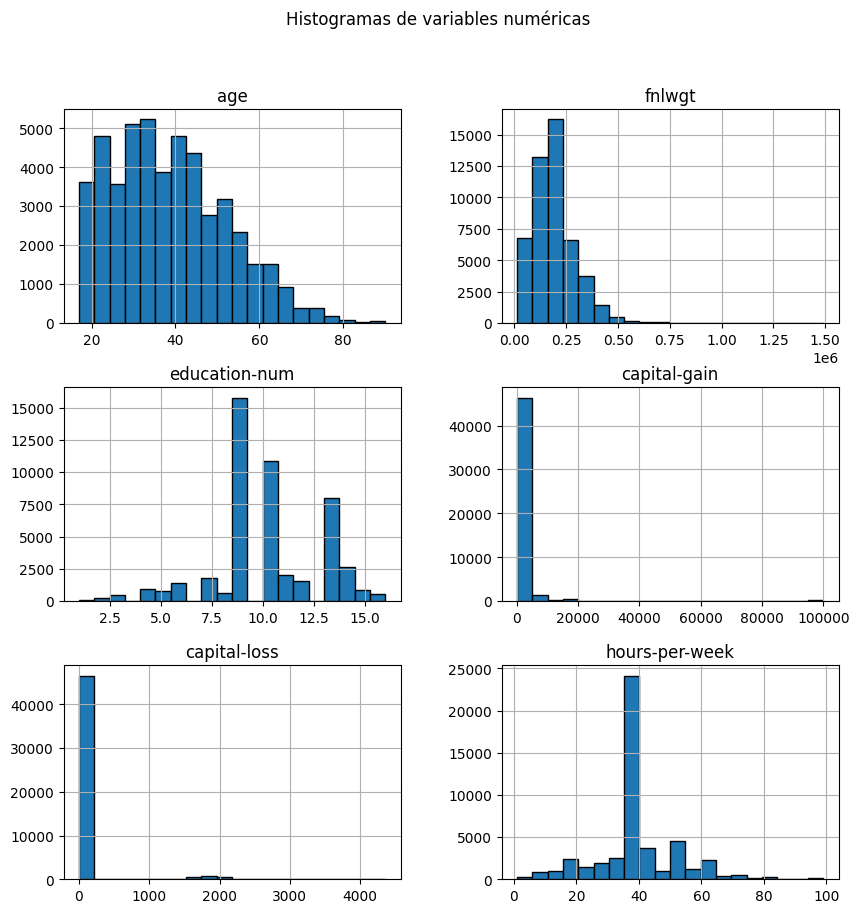

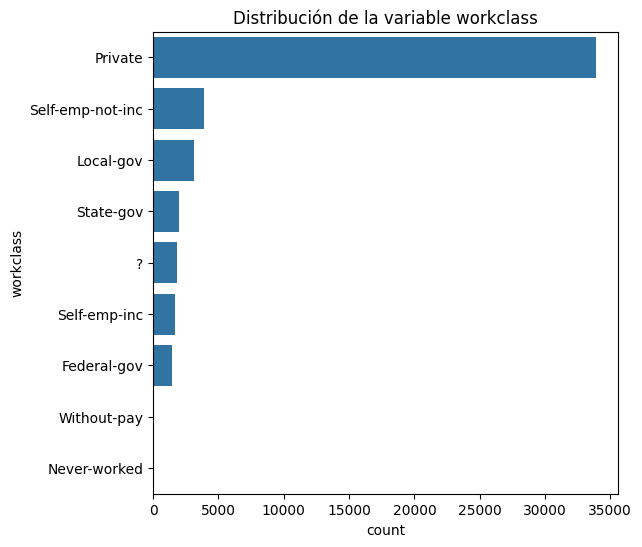

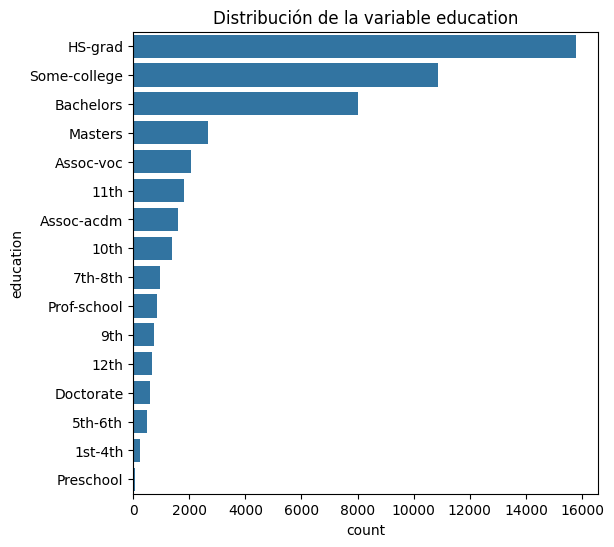

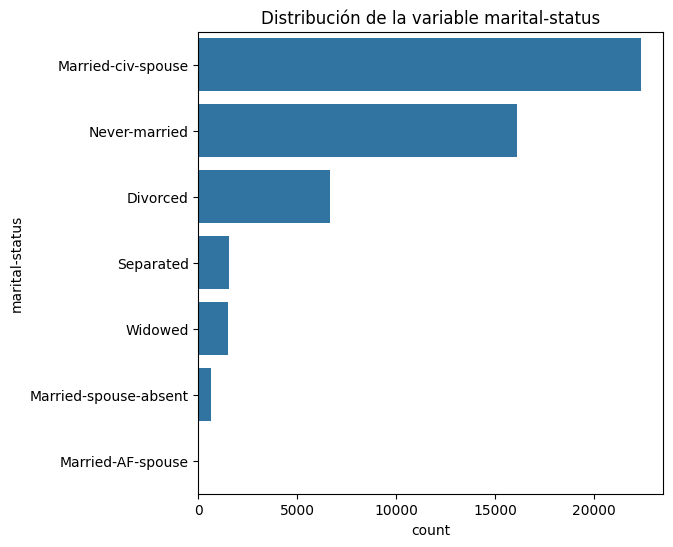

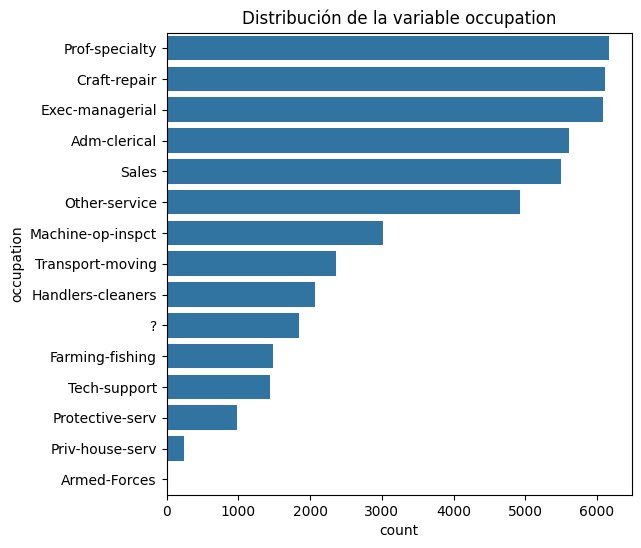

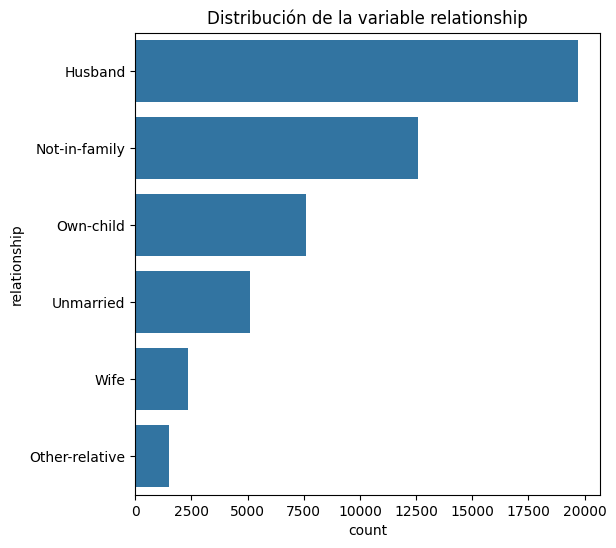

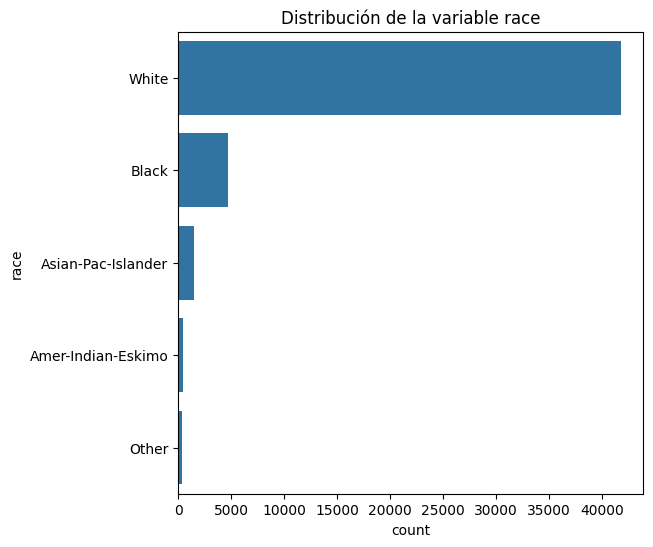

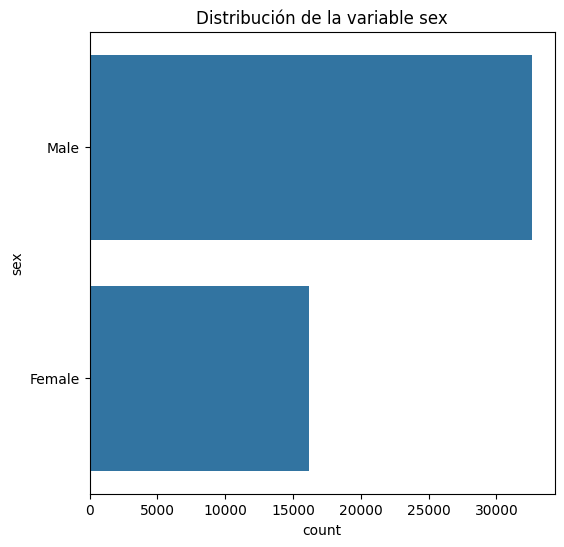

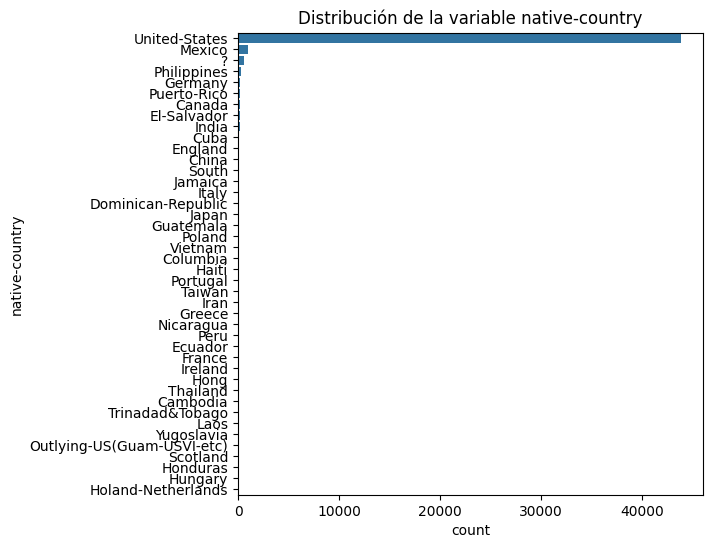

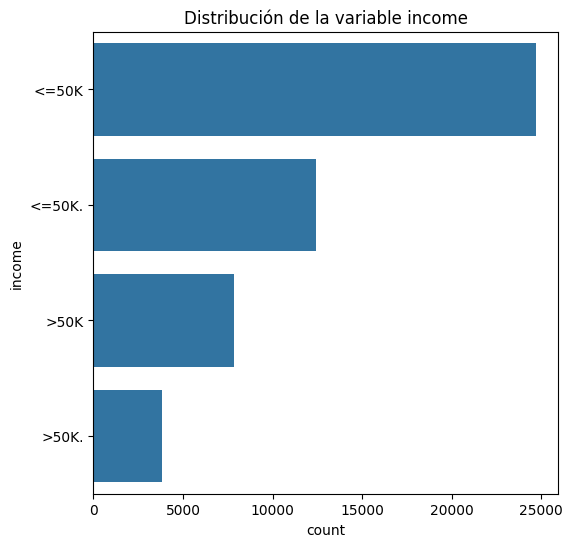

In [79]:
df.select_dtypes(include='number').hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.suptitle("Histogramas de variables numéricas")
plt.show()

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribución de la variable {col}")
    plt.show()

In [80]:
for col in col_no_num:
    print(f"Frecuencia de la variable '{col}':")
    print(df[col].value_counts())
    print("\n")

Frecuencia de la variable 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Frecuencia de la variable 'education':
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


Frecuencia de la variable 'marital-status':
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spou

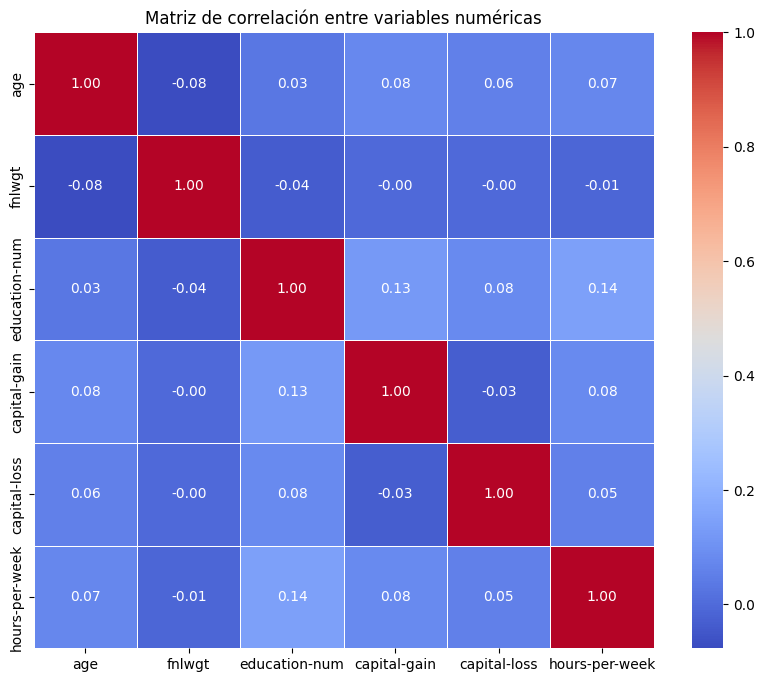

In [81]:
matrix = df[col_num].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

 Para las variables numericas, age tiene una distribución en general normal, aunque cierta asimetría en edades mas avanzadas.
 capital-gain y capital-loss no tienen una distribución normal, muy sesgadas cerca de 0.
 hours-per-week tiene una distribución muy centrada cerca de 40h, lo esperado de una jornada laboral normal.

 En las variables categorícas, tenemos workclass que tiene la categoría Private de una forma muy frecuente
 en education, HS-grad, Some-college y Bachelors predominan como categorías.
 Y por ultimo, sex no esta bien balanceado, lo que sugiere un sesgo masculino en el dataset (>30000 vs >15000).

 La variable objetivo del dataset (que venia como tal al descargarse el dataset con la libreria de ucimlrepo, predomina con casi la mitad de personas con un income de menos de 50mil

 En el resto de variables sigue una distribución parecida (no normal) y esperable.

 No hay apenas correlación entre las variables numéricas.

 Hay una cantidad importante de valores nulos en terminos absolutos (mas de 1000, al menos) y en terminos relativos no tanto (quizas un 2-3%)

_Comentarios:_

### 3. Análisis de datos faltantes y detección de outliers.

3.1. ¿Hay datos faltantes o no observados en las variables de tu dataset? ¿Qué metodología vas a utilizar para procesar estos datos (imputación, eliminación, interpolación,..)? ¿Cuál es la motivación para utilizar la metodología escogida?

3.2. Obtener el porcentaje de datos faltantes en cada variable.

3.2. Procesar los datos faltantes con la metodología escogida.

3.3. Realizar la detección de outliers o valores extremos.

3.4. ¿Que técnica has utilizado para detectar outliers?¿Por qué has escogido esta?


In [87]:
print(df.isnull().sum()[df.isnull().sum() > 0] / len(df) * 100)

workclass         1.971664
occupation        1.977806
native-country    0.560993
dtype: float64


Tenemos un 1,97% de workclass y occupation y un 0,56% de native-country

In [89]:
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in col_num:
    df[col].fillna(df[col].median(), inplace=True)

print(df.isnull().sum().sum())

0


In [90]:
Q1 = df[col_num].quantile(0.25)
Q3 = df[col_num].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[col_num] < (Q1 - 1.5 * IQR)) | (df[col_num] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

age                 216
fnlwgt             1453
education-num      1794
capital-gain       4035
capital-loss       2282
hours-per-week    13496
dtype: int64


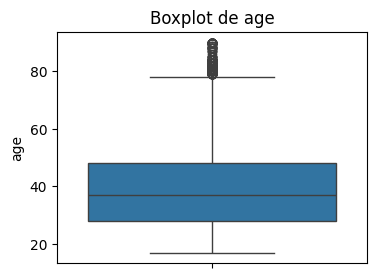

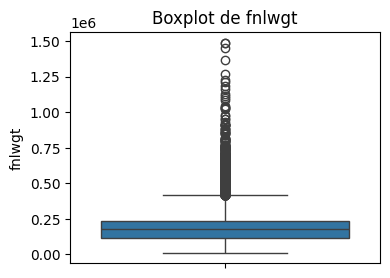

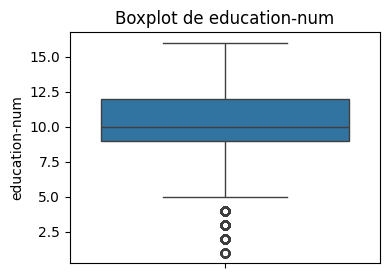

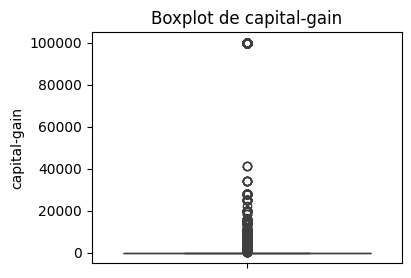

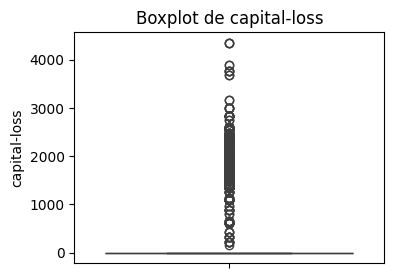

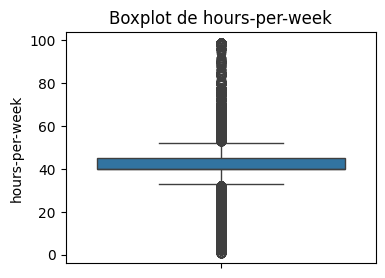

In [91]:
outliers = ((df[col_num] < (Q1 - 1.5 * IQR)) | (df[col_num] > (Q3 + 1.5 * IQR)))

df_outliers = df[outliers.any(axis=1)]

for col in col_num:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

In [92]:
df_outliers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48825,64,Self-emp-not-inc,136405,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,32,United-States,<=50K.
48827,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50K.
48833,31,Private,440129,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


_Comentarios:_


Para la imputacion de valores he usado:
las variables categóricas: Imputación con la moda (categoría más frecuente), ya que ayuda a conservar la estructura general del dataset.
Para las variables numéricas: Imputación con la mediana, ya que es robusta frente a outliers y evita sesgar los resultados, podemos usar modelos de regresion, 
knn imputer (se basa en x vecinos de cada registro ) también.



Aunque he elegido hacer en general, algo simple y variar respecto a otros cuadernos del curso, he intentado usar tecnicas que conocia menos. Nunca he imputado la moda en categorias, y no se como va a salir. Si fuera a entrenar un modelo, eliminaria esos registros del dataset en vez de imputar la moda.





### 4. Transformación y escalado de variables

4.1. Relizar la codificación de las variables categóricas (one hot-encoding, ordinal). ¿Qué técnica has escogido para codificar cada variable? ¿Por qué?

4.2. ¿Consideras que sería necesario llevar a cabo algún tipo de transfomació en alguna de las variables numéricas? ¿Cuál? ¿Por qué? En caso de no verlo oportuno, para ver que se han asimilado los conceptos, realiza la transformación logarítmica de una variable que escojas.

4.3. Realiza la estandarización o escalado pertinente de los datos del dataset (hay que utilizar el dataset resultando del tratamiento de datos faltando y outliers, y de las transformacons previas de este punto) .

In [96]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Valores unique en {col}:")
    for i in df[col].unique():
        print(i)
    print("\n")

Valores unique en workclass:
State-gov
Self-emp-not-inc
Private
Federal-gov
Local-gov
?
Self-emp-inc
Without-pay
Never-worked


Valores unique en education:
Bachelors
HS-grad
11th
Masters
9th
Some-college
Assoc-acdm
Assoc-voc
7th-8th
Doctorate
Prof-school
5th-6th
10th
1st-4th
Preschool
12th


Valores unique en marital-status:
Never-married
Married-civ-spouse
Divorced
Married-spouse-absent
Separated
Married-AF-spouse
Widowed


Valores unique en occupation:
Adm-clerical
Exec-managerial
Handlers-cleaners
Prof-specialty
Other-service
Sales
Craft-repair
Transport-moving
Farming-fishing
Machine-op-inspct
Tech-support
?
Protective-serv
Armed-Forces
Priv-house-serv


Valores unique en relationship:
Not-in-family
Husband
Wife
Own-child
Unmarried
Other-relative


Valores unique en race:
White
Black
Asian-Pac-Islander
Amer-Indian-Eskimo
Other


Valores unique en sex:
Male
Female


Valores unique en native-country:
United-States
Cuba
Jamaica
India
?
Mexico
South
Puerto-Rico
Honduras
England
Canada

In [97]:
## Bueno, en estas variables categoricas, en las que hay un orden logico, lo logico, es hacer una codificacion ordinal, que estara ordenada.
## Por ejemplo, no tener estudios podria ser un 1, la ESO un 2, Bachiller un 3, Grado un 4, Master un 5, PhD un 6, en este caso usaremos las
## definiciones de las categorias del dataset pero era para explicarlo
education = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",   # universidad sin acabar
    "Assoc-voc",      # fp medio?
    "Assoc-acdm",     # fp sup?
    "Bachelors",      # grado
    "Masters",
    "Prof-school",    # profesiones regladas como arquitectos, medicos, etc
    "Doctorate"       # Doctorado (PhD)
]

#ademas podemos considerar la relacion como un grado, aunque no sea perfecto, se puede considerar un orden, y para este dataset es interesante
relationship = [
    "Own-child",        # dependencia maxima (menor responsabilidad)
    "Other-relative",   # hermanos, abuelos, etc.
    "Unmarried",        # podria ser independiente o no
    "Not-in-family",    # vive con otros o fuera ya del domicilio, sin vinculo fuerte
    "Wife",             # pareja, posible co-dependencia económica
    "Husband"           # jefe de familia, mayor responsabilidad
]
marital_status = [
    "Never-married",    # nunca casado
    "Married-spouse-absent", #abandonado, separacion prolongada, en prision
    "Separated",        # en proceso de separacion
    "Divorced",
    "Widowed",          # viudo/a
    "Married-civ-spouse", # personas casadas que viven en pareja
    "Married-AF-spouse" # casados pero dentro de las fuerzas armadas
]


In [98]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [99]:

categorical_ohe = ['workclass', 'occupation', 'race', 'sex', 'native-country']
df2 = pd.get_dummies(df, columns=categorical_ohe, drop_first=True)

# Aplicar Ordinal Encoding con orden predefinido
encoder = OrdinalEncoder(categories=[education, marital_status, relationship])
df2[['education', 'marital-status', 'relationship']] = encoder.fit_transform(df[['education', 'marital-status', 'relationship']])


# capital-gain - capital-loss podria ser una columa llamada net-capital
df2['net-capital']= df2['capital-gain'] - df2 ['capital-loss']

# Verificar que se ha aplicado correctamente el encoding
print(encoder.categories_)

print(df2.head())

[array(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
       '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
       'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
      dtype=object), array(['Never-married', 'Married-spouse-absent', 'Separated', 'Divorced',
       'Widowed', 'Married-civ-spouse', 'Married-AF-spouse'], dtype=object), array(['Own-child', 'Other-relative', 'Unmarried', 'Not-in-family',
       'Wife', 'Husband'], dtype=object)]
   age  fnlwgt  education  education-num  marital-status  relationship  \
0   39   77516       12.0             13             0.0           3.0   
1   50   83311       12.0             13             5.0           5.0   
2   38  215646        8.0              9             3.0           3.0   
3   53  234721        6.0              7             5.0           5.0   
4   28  338409       12.0             13             5.0           4.0   

   capital-gain  capital-loss  hours-per-week income  ...  \
0     

In [100]:
#df2.info()
eliminar = [#'education',
            'fnlwgt','native-country_United-States','race_White', 'capital-gain', 'capital-loss']
df2.drop(columns=eliminar, inplace=True)


In [101]:
print(df['education'].unique())
print(df['education-num'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [102]:
# eso me ha sugerido que mi encoding y el existente era el mismo, por tanto elimino education-num, que si bien los indicios
# dicen que es la misma columna, y el mismo orden, por si acaso, ya que lo tengo recalculado, uso mi calculo que se seguro
df2.drop(columns='education-num', inplace=True)

In [103]:
#df2.columns
#cambio el tipo tambien a income
df2['income'] = df2['income'].replace({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1}).astype(int)
print(df2['income'].unique())

[0 1]


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  int64  
 1   education                                  48842 non-null  float64
 2   marital-status                             48842 non-null  float64
 3   relationship                               48842 non-null  float64
 4   hours-per-week                             48842 non-null  int64  
 5   income                                     48842 non-null  int64  
 6   workclass_Federal-gov                      48842 non-null  bool   
 7   workclass_Local-gov                        48842 non-null  bool   
 8   workclass_Never-worked                     48842 non-null  bool   
 9   workclass_Private                          48842 non-null  bool   
 10  workclass_Self-emp-inc

### 5. Extracción de características

5.1. ¿Hay alguna o algunas características redundantes?

5.2. Plantear la selección de características basada en filtros. ¿Qué criterio o criterios consideras utilizar?

 NOTA: Como hemos visto en la PEC, dependiendo si estamos frente a un problema de clasificación o de regresión, los score_func que se pueden utilizar son diferentes.

5.3. Plantear la selección de característica basada en métodos wrapper. ¿Qué método has utilizado, hacia adelante o hacia atrás?

NOTA: la función del modelo y la función de coste variará dependiendo del tipo de problema. En el apartado 3.2, hemos trabajado con un modelo de clasificación. Las funciones análogas de obtención del modelo (get_modelos()) y de evaluación del modelo (evaluate_modelo) para resolver un problema de regresión se adjunta a la celda siguiente por si vuestro problema atiende a este tipo.

5.4. ¿Qué resultados ofrecen ambos métodos (filtros y wrappers)? Atendiendo a los resultados, ¿propones excluir alguna característica? ¿En qué criterio te basas para ello?


In [107]:
### funciones análogas del apartado 3.2 para resolver problemas de classificación:

In [108]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función - obtener los modelos
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
		model = RandomForestRegressor(random_state=44)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  scores = mean_absolute_percentage_error(y_test, y_pred)
  return scores

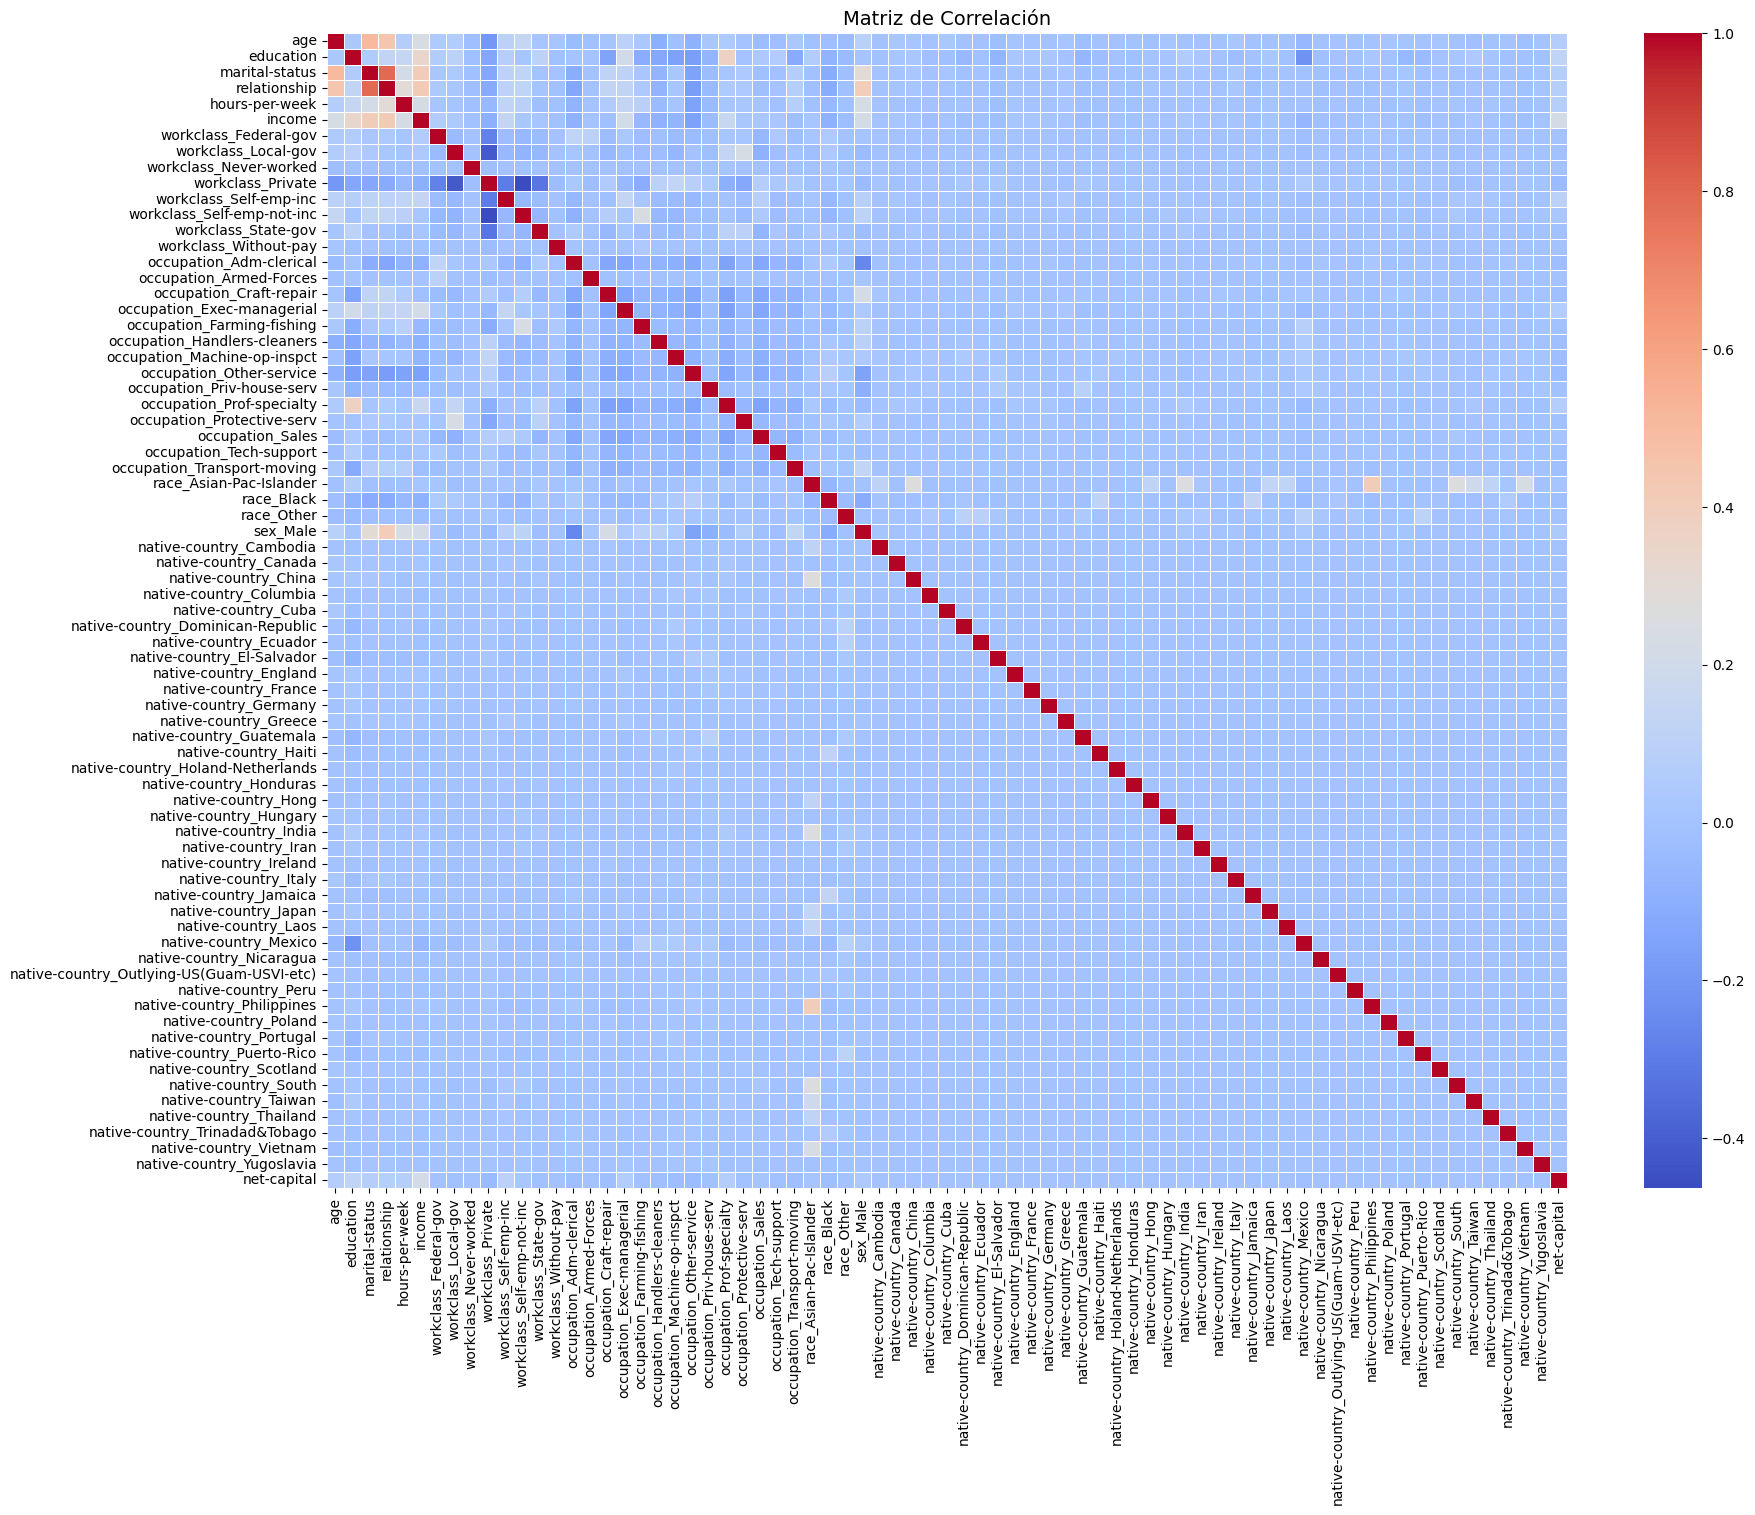

In [109]:
## Codigo
## Se pueden añadir tantas celdas como se crea conveniente para organizar el codigo de la mejor manera que considereis
corr_matrix = df2.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

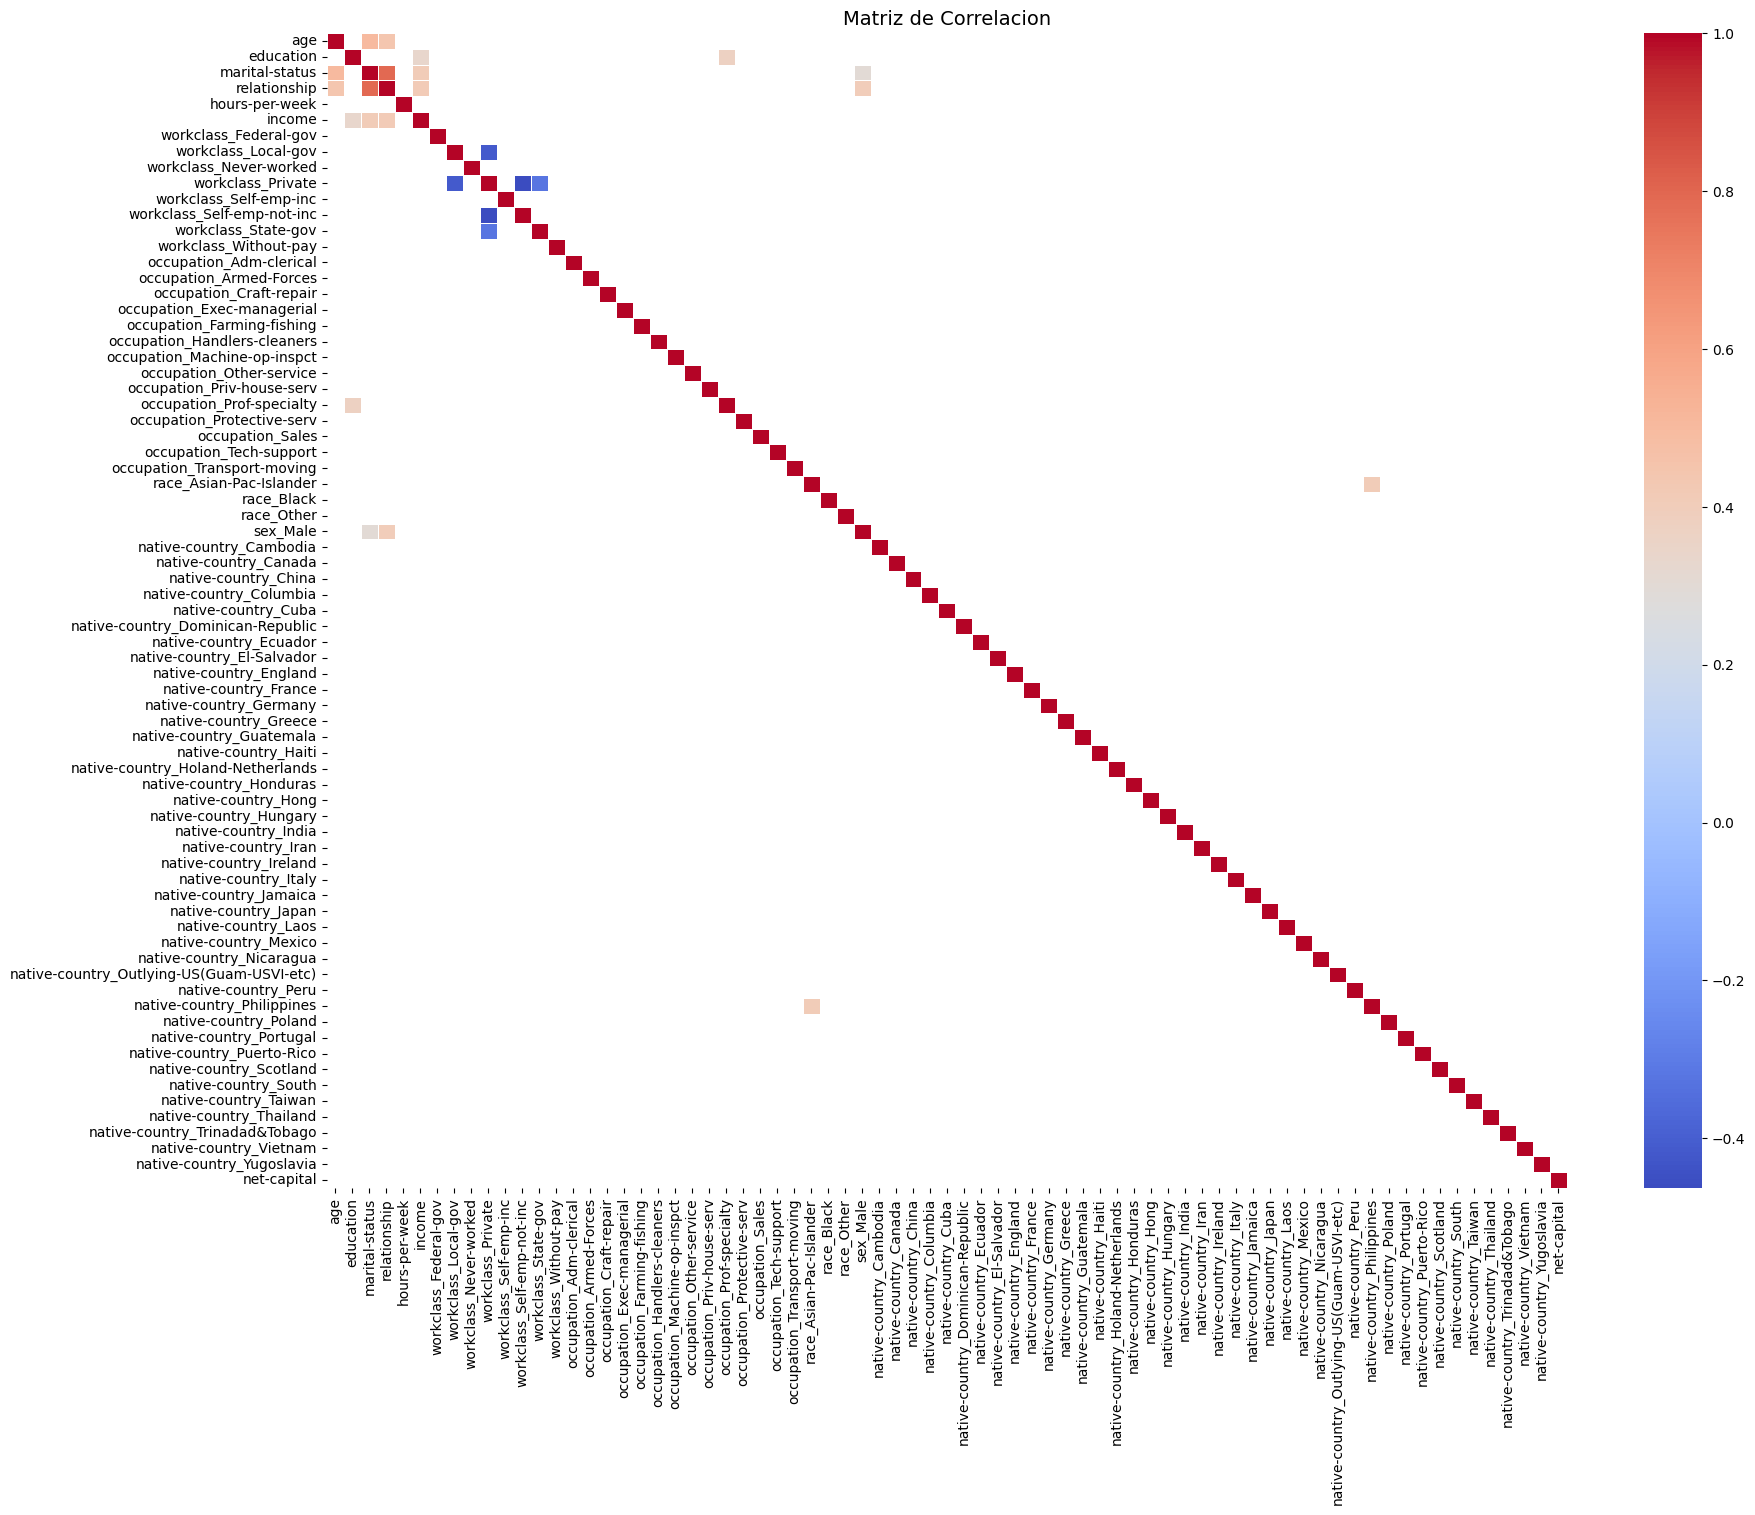

In [110]:
top_corr = corr_matrix[(corr_matrix >= 0.30) | (corr_matrix <= -0.30)]
plt.figure(figsize=(20, 15))
sns.heatmap(top_corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlacion", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

5.1 Las variables redundantes ya las quité en el apartado anterior. En concreto education y education-num

In [112]:
df3 = df2.copy()
df4 = df2.copy()
df5 = df2.copy()

In [113]:
#5.2
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df2.drop(columns=['income'])
y = df2['income']

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

puntuacion_caracteristicas = pd.DataFrame({'Característica': X.columns, 'Puntuación': selector.scores_})
puntuacion_caracteristicas = puntuacion_caracteristicas.sort_values(by='Puntuación', ascending=True)

print("Características con menor importancia:")
print(puntuacion_caracteristicas.head(10)) 

umbral = 0.006
caracteristicas_poca_importancia = puntuacion_caracteristicas[puntuacion_caracteristicas['Puntuación'] < umbral]['Característica'].tolist()

df2.drop(columns=caracteristicas_poca_importancia, inplace=True)

print(f"Se eliminaron {len(caracteristicas_poca_importancia)} características con baja importancia.")


Características con menor importancia:
                 Característica  Puntuación
33         native-country_China         0.0
27      race_Asian-Pac-Islander         0.0
32        native-country_Canada         0.0
37       native-country_Ecuador         0.0
39       native-country_England         0.0
40        native-country_France         0.0
43     native-country_Guatemala         0.0
46      native-country_Honduras         0.0
26  occupation_Transport-moving         0.0
47          native-country_Hong         0.0
Se eliminaron 59 características con baja importancia.


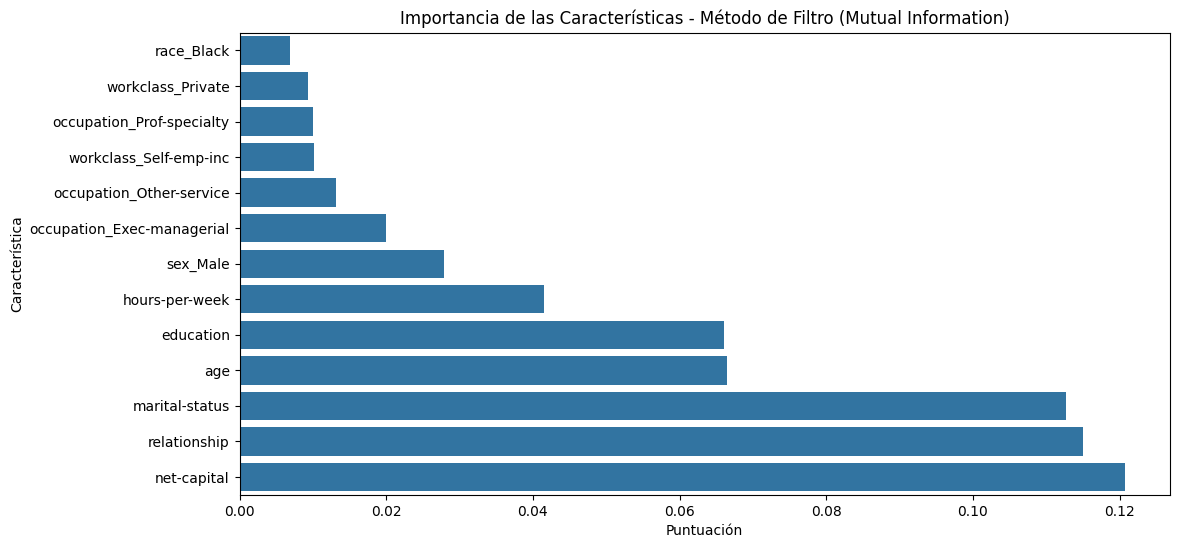

In [114]:
puntuacion_caracteristicas = puntuacion_caracteristicas[~puntuacion_caracteristicas['Característica'].isin(caracteristicas_poca_importancia)]


plt.figure(figsize=(12, 6))
sns.barplot(x=puntuacion_caracteristicas['Puntuación'], y=puntuacion_caracteristicas['Característica'])
plt.title("Importancia de las Características - Método de Filtro (Mutual Information)")
plt.show()


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         48842 non-null  int64  
 1   education                   48842 non-null  float64
 2   marital-status              48842 non-null  float64
 3   relationship                48842 non-null  float64
 4   hours-per-week              48842 non-null  int64  
 5   income                      48842 non-null  int64  
 6   workclass_Private           48842 non-null  bool   
 7   workclass_Self-emp-inc      48842 non-null  bool   
 8   occupation_Exec-managerial  48842 non-null  bool   
 9   occupation_Other-service    48842 non-null  bool   
 10  occupation_Prof-specialty   48842 non-null  bool   
 11  race_Black                  48842 non-null  bool   
 12  sex_Male                    48842 non-null  bool   
 13  net-capital                 488

In [116]:
modelo_base = RandomForestClassifier(random_state=44)

X = df3.drop(columns=['income'])
y = df3['income']

rfe = RFE(estimator=modelo_base, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

caracteristicas_seleccionadas = X.columns[rfe.support_]
caracteristicas_eliminadas = X.columns[~rfe.support_]

print("Características seleccionadas por RFE:")
print(caracteristicas_seleccionadas)

print("Características eliminadas por RFE:")
print(caracteristicas_eliminadas)

df3.drop(columns=caracteristicas_eliminadas, inplace=True)

Características seleccionadas por RFE:
Index(['age', 'education', 'marital-status', 'relationship', 'hours-per-week',
       'workclass_Private', 'occupation_Exec-managerial',
       'occupation_Prof-specialty', 'sex_Male', 'net-capital'],
      dtype='object')
Características eliminadas por RFE:
Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'native-country_Cambodia', 'native-country_Canada',

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         48842 non-null  int64  
 1   education                   48842 non-null  float64
 2   marital-status              48842 non-null  float64
 3   relationship                48842 non-null  float64
 4   hours-per-week              48842 non-null  int64  
 5   income                      48842 non-null  int64  
 6   workclass_Private           48842 non-null  bool   
 7   occupation_Exec-managerial  48842 non-null  bool   
 8   occupation_Prof-specialty   48842 non-null  bool   
 9   sex_Male                    48842 non-null  bool   
 10  net-capital                 48842 non-null  int64  
dtypes: bool(4), float64(3), int64(4)
memory usage: 2.8 MB


In [118]:
from sklearn.feature_selection import VarianceThreshold


X = df4.drop(columns=['income'])
y = df4['income']

umbral_varianza = VarianceThreshold(threshold=0.03)
X_varianza = umbral_varianza.fit_transform(X)

caracteristicas_alta_varianza = X.columns[umbral_varianza.get_support()]
caracteristicas_baja_varianza = X.columns[~umbral_varianza.get_support()]

print("Características eliminadas por baja varianza:", caracteristicas_baja_varianza)

df4 = df4[caracteristicas_alta_varianza]

Características eliminadas por baja varianza: Index(['workclass_Federal-gov', 'workclass_Never-worked',
       'workclass_Without-pay', 'occupation_Armed-Forces',
       'occupation_Farming-fishing', 'occupation_Priv-house-serv',
       'occupation_Protective-serv', 'occupation_Tech-support', 'race_Other',
       'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-country_Greece',
       'native-country_Guatemala', 'native-country_Haiti',
       'native-country_Holand-Netherlands', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'nativ

In [119]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           48842 non-null  int64  
 1   education                     48842 non-null  float64
 2   marital-status                48842 non-null  float64
 3   relationship                  48842 non-null  float64
 4   hours-per-week                48842 non-null  int64  
 5   workclass_Local-gov           48842 non-null  bool   
 6   workclass_Private             48842 non-null  bool   
 7   workclass_Self-emp-inc        48842 non-null  bool   
 8   workclass_Self-emp-not-inc    48842 non-null  bool   
 9   workclass_State-gov           48842 non-null  bool   
 10  occupation_Adm-clerical       48842 non-null  bool   
 11  occupation_Craft-repair       48842 non-null  bool   
 12  occupation_Exec-managerial    48842 non-null  bool   
 13  o

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [121]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  int64  
 1   education                                  48842 non-null  float64
 2   marital-status                             48842 non-null  float64
 3   relationship                               48842 non-null  float64
 4   hours-per-week                             48842 non-null  int64  
 5   income                                     48842 non-null  int64  
 6   workclass_Federal-gov                      48842 non-null  bool   
 7   workclass_Local-gov                        48842 non-null  bool   
 8   workclass_Never-worked                     48842 non-null  bool   
 9   workclass_Private                          48842 non-null  bool   
 10  workclass_Self-emp-inc

_Comentarios:_

### 6. Reducción dimensionalidad

6.1 Aplicar una técnica de reducción de la dimensionalidad. La PCA es el método comúnmente utilizado y que se recomienda para la realización de este ejercicio; no obstante, podéis explorar y utilizar otra técnica (SVD, LDA,..) si lo consideráis oportuno.

6.2. ¿Qué técnica has utilizado?

6.3. ¿Cuantas dimensiones o componentes tiene tu dataset después de aplicar la técnica de reducción de dimensionalidad? ¿Por qué has considerado solo este número de componentes?

6.4. Representar la relación entre los componentes principales y la variable de respuesta.
Sugerencia: Representar mediante un scatter plot componente1 vs componente2 codificando los puntos con un color correspondiente en la clase o variable de respuesta, otro componente1 vs componente3 codificando los puntos con un color correspondiente en la clase o variable de respuesta, ... ¿Qué interpretas de esta representación?

In [125]:
## Código
## Se pueden añadir tantas celdas como se crea conveniente para organizar el codigo de la mejor manera que considereis
# 6.1
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df2.drop(columns=['income'])
y = df2['income']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", explained_variance)





Varianza explicada acumulada: [0.21245536 0.32791392 0.42218731 0.51348139 0.59081553 0.66561935
 0.73875128 0.80272852 0.85798928 0.90863036 0.94885303 0.98530427
 1.        ]


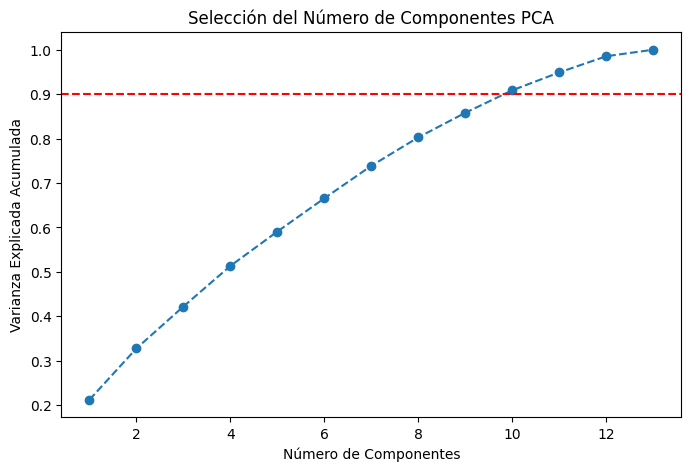

In [126]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--') 
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Selección del Número de Componentes PCA')
plt.show()



In [127]:
n_components_optimos = np.argmax(explained_variance >= 0.90) + 1
pca_opt = PCA(n_components=n_components_optimos)
X_pca_opt = pca_opt.fit_transform(X_scaled)

print(f"Número de componentes seleccionados: {n_components_optimos}")

Número de componentes seleccionados: 10


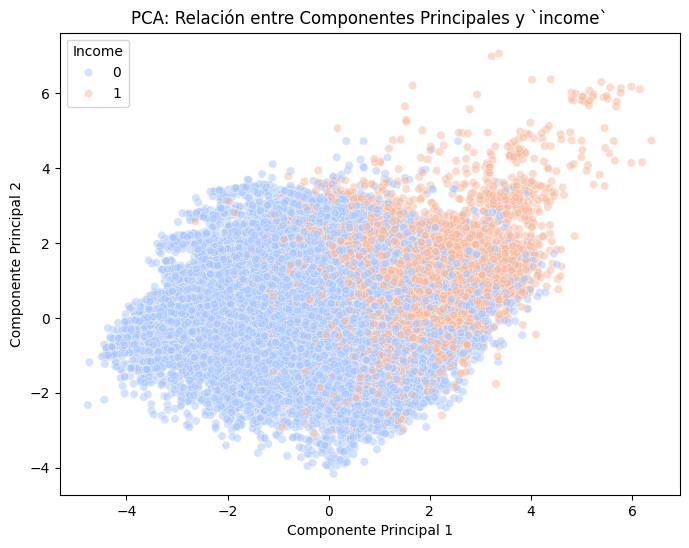

In [128]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 1], hue=y, alpha=0.5, palette='coolwarm')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA: Relación entre Componentes Principales y `income`")
plt.legend(title="Income")
plt.show()

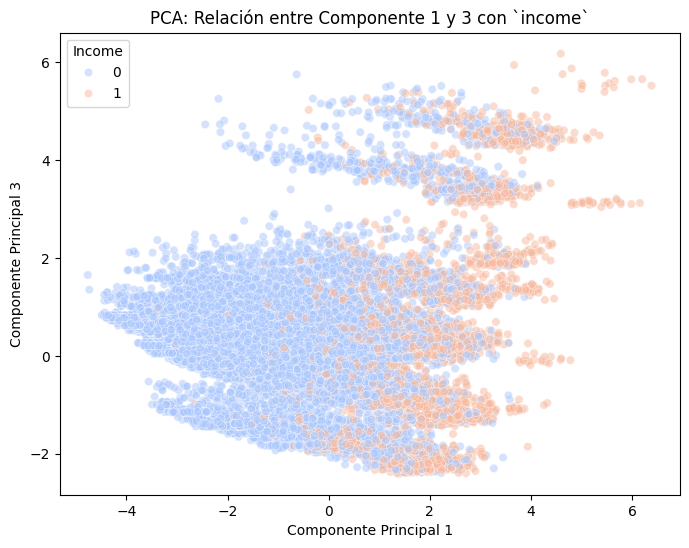

In [129]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_opt[:, 0], y=X_pca_opt[:, 2], hue=y, alpha=0.5, palette='coolwarm')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 3")
plt.title("PCA: Relación entre Componente 1 y 3 con `income`")
plt.legend(title="Income")
plt.show()

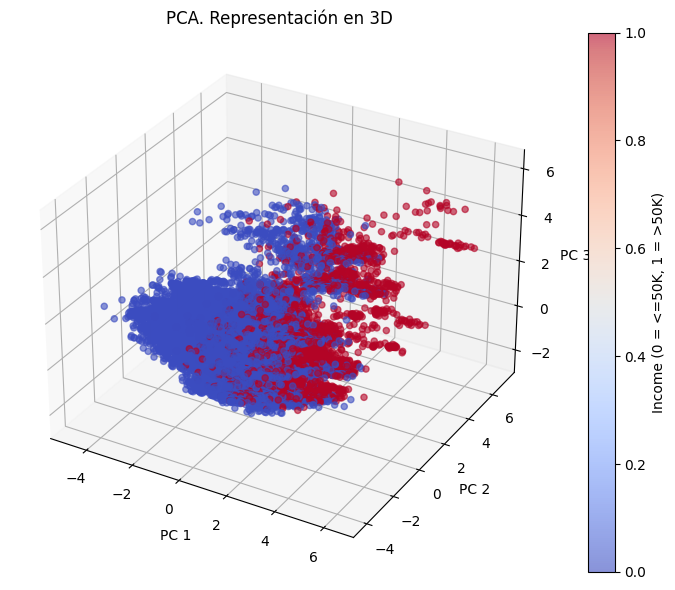

In [130]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], X_pca_opt[:, 2], 
                     c=y, cmap='coolwarm', alpha=0.6)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("PCA. Representación en 3D")

# Agregar barra de colores
plt.colorbar(scatter, ax=ax, label="Income (0 = <=50K, 1 = >50K)")

# Mostrar gráfico
plt.show()

_Comentarios:_

### 7. Breves conclusiones o comentarios de los resultados obtenidos en este ejercicio

_Comentarios:_

Recapitulando:
He hecho un analisis descriptivo, para ello, he puesto desde graficas,a valores varios del dataset. A continuacion he hecho un analisis de valores outliers, que basicamente es tener una estrategia y una razon para ella. A continuacion he transformado las variables, principalmente codificar, todas las variables que he podido y que era coherente hacer. He escalado y he eliminado caracteristicas que tenian muy baja correlacion. Por ultimo lo he dibujado en un grafico, si bien 2D no es suficiente pero se ve, 3D tampoco, ya que tendriamos que comparar asi y dibujar 9 dimensiones que la verdad seria complicado visualizarlo, pero lo que he hecho sirve para entenderlo.